<div style="height:300;background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h1>Debunking modeling procedure: ID_2</h1>
    <h2></h2>
    <hr>
    <h3>By: Gari Ciodaro Guerra</h3>
</div>
 	

# ID_2
+ new_precision: 0.895	
+ new_f1_score: 0.803
+ p_value: 0.0128
+ mean_HEALTHY: 0.465
+ mean_ADHD: 0.555 	
+ pre_processing: clustering K=11
+ Features: delta_theta  
+ Machine_learning_technique: XGB
+ Transformation: polynomial
+ train score: 0.939
+ precision: 0.862 (before removing problematics subjects)



 	 	 	 	 	 		 	 	 	

In [2]:


#Requiered libs
import pandas as pd
import numpy as np
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind,bartlett
import seaborn as sns
import os
#from xgboost import XGBClassifier
#from xgboost import plot_importance
import pandas as pd
import graphviz
import xgboost as xgb
import imageio

#Set general style of plots(optional)
#mpl.style.use(['ggplot'])

import sys

#path_to_class="/home/gari/Desktop/master_tesis_v3/"
#sys.path.append(path_to_class)
#from OFHandlers import OFHandlers as OFH
#from OFHandlers import OFHandlers as OFH
import OFHandlers as OFH

In [3]:
#import OFHandlers as OFH
ID_2=OFH.load_object("./ID_2/eeg_delta_theta/eeg_delta_theta_clf.file")

In [4]:
eeg_delta_theta_poly_obj=OFH.load_object("./ID_2/eeg_delta_theta/eeg_delta_theta_poly_obj.file")

In [5]:
#eeg_delta_theta_poly_obj.get_feature_names()

In [6]:
def transform_logodd_to_prob(x):
    return np.exp(x)/(1+np.exp(x))

In [7]:
transform_logodd_to_prob(0.1343)

0.5335246262586186

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:5px">
    <h2>hyperparameter ID_2</h2>
</div>

In [8]:
ID_2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:5px">
    <h3>Decision tree 0 of 99</h3>
</div>

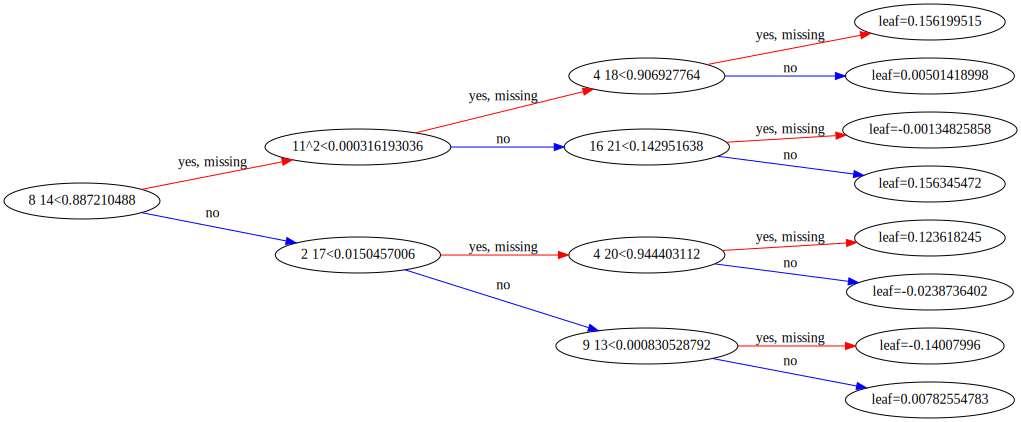

In [9]:

#fig=plt.figure()
#ax=fig.add_subplot(1,1,1)
tree_vi=xgb.to_graphviz(ID_2, num_trees=2,yes_color="red", no_color="blue", rankdir='LR')
#tree_vi.render("./tree2")
tree_vi

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:5px">
    <h3>Decision tree 45 of 99</h3>
</div>

In [43]:
tree_vi=xgb.to_graphviz(ID_2, num_trees=1,yes_color="red", no_color="blue", rankdir='LR')
#plt.savefig('./tree0.pdf',pad_inches=0.0,transparent=True,bbox_inches="tight") 
tree_vi.render("./tree1")

'./tree1.pdf'

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:5px">
    <h3>Decision tree 99 of 99</h3>
</div>

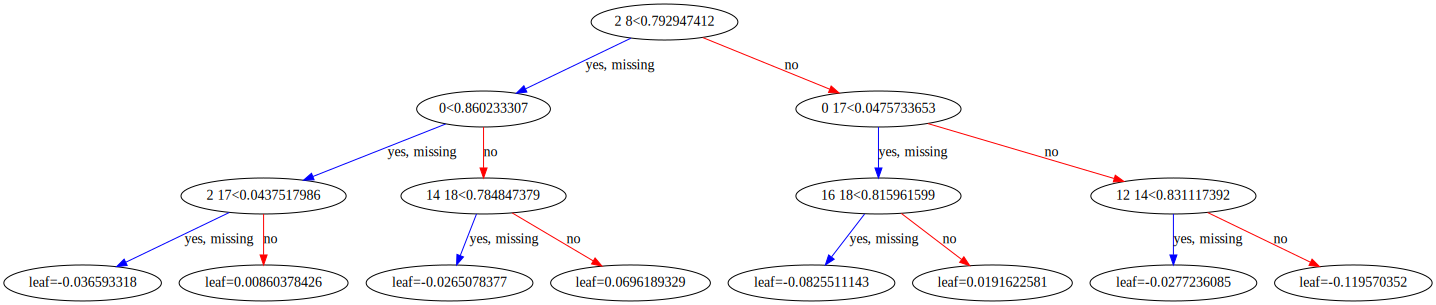

In [6]:

xgb.to_graphviz(ID_2, num_trees=99)

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:5px">
    <h3>Possible criteria  feature importance</h3>
</div>

+ Weight. The number of times a feature is used to split the data across all trees.
+ Cover. The number of times a feature is used to split the data across all trees weighted by the number of training data points that go through those splits.
+ Gain. The average training loss reduction gained when using a feature for splitting.

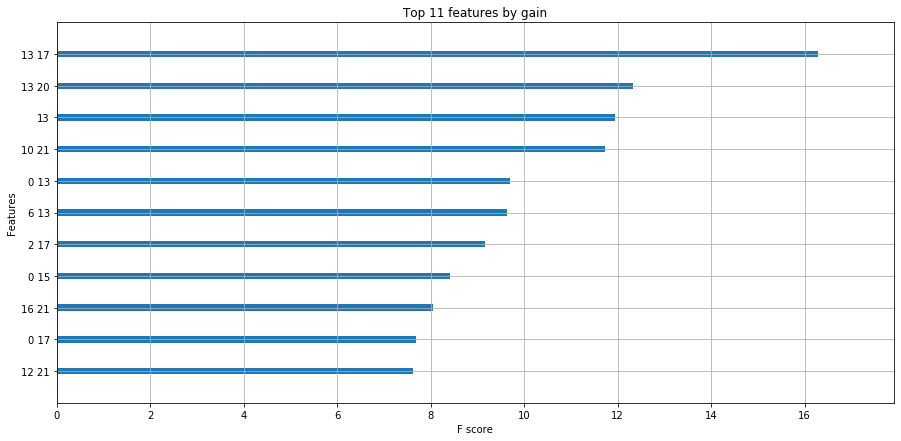

In [13]:
fig=plt.figure(figsize=(15,7))

ax0=fig.add_subplot(1,1,1)

xgb.plot_importance(ID_2,ax=ax0,importance_type="gain",
                    max_num_features=11,
                    show_values=False,title="Top 11 features by gain")

plt.savefig('importance_gain.pdf',pad_inches=0.0,transparent=True,bbox_inches="tight") 
plt.show()


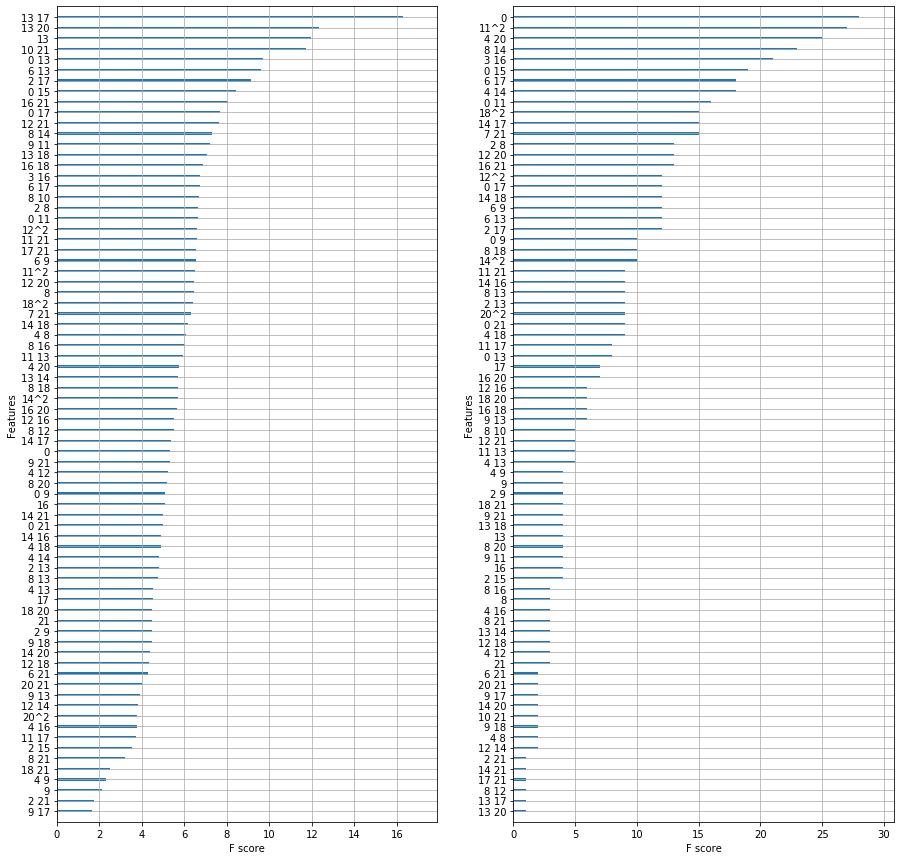

In [41]:
fig=plt.figure(figsize=(15,15))

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)


xgb.plot_importance(ID_2,ax=ax0,importance_type="gain",
                    show_values=False,title=None)

xgb.plot_importance(ID_2,ax=ax1,importance_type="weight",
                    show_values=False,
                    title=None)
plt.savefig('feature_importance.pdf',pad_inches=0.0,transparent=True,bbox_inches="tight") 
plt.show()

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:5px">
    <h3>3-D plot of clustered montage</h3>
</div>

In [17]:
path_cluster="/home/gari/Desktop/master_tesis_v3/selected_experiments/ID_2/"
clustered_channels=OFH.load_object(path_cluster+"GSN_HydroCel_129_clustered.file")

In [18]:
clustered_channels

,channels_pos,cluster,X,Y,Z
labels,,,,,
E1,E1,2,5.520863e+00,-5.787678,-2.577469
E2,E2,2,6.709098e+00,-5.291805,0.307435
E3,E3,5,7.634241e+00,-3.864122,3.067770
E4,E4,5,7.145709e+00,-2.868838,4.989565
E5,E5,5,5.686621e+00,-1.479340,6.812878
E6,E6,10,3.806770e+00,-0.000000,7.891305
E7,E7,6,1.558864e+00,1.223800,8.440439
E8,E8,2,7.998817e+00,-4.221902,-1.354790
E9,E9,9,8.884820e+00,-2.695406,1.088308


In [29]:
#code to generara 3-D plot of rotation.

for each_angle in np.arange(0,360,10):
    n_clusters=11
    colors_list=sns.color_palette("husl", n_clusters)

    i=0
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    for label,df in clustered_channels.groupby("cluster"):

        ax.scatter(df.X, df.Y, df.Z,color=colors_list[i],label=label)
        ax.plot_trisurf(df.X, df.Y, df.Z,color=colors_list[i],alpha=0.5)
        #ax.view_init(30)
        i=i+1
    plt.legend()
    ax.set_title("Clustered K 11 montage")
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    ax.view_init(30, each_angle)
    plt.savefig("./img_ID_2/montage_rotation/"+str(each_angle)+"_3d.png",
                bbox_inches="tight", pad_inches=0)
    plt.close()
    
images=[]
for each_angle in np.arange(0,360,10):
    images.append(imageio.imread("./img_ID_2/montage_rotation/"+str(each_angle)+"_3d.png"))

imageio.mimsave( "./img_ID_2/montage_rotation.gif", images, duration=0.5)

In [19]:
df.Y.mean()

NameError: name 'df' is not defined

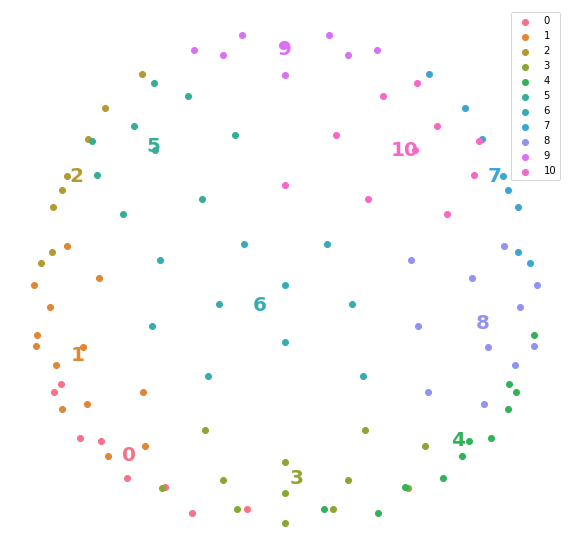

In [8]:
n_clusters=11
colors_list=sns.color_palette("husl", n_clusters)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

i=0
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for label,df in clustered_channels.groupby("cluster"):
    ax.scatter(df.Y, df.X,color=colors_list[i],label=label)
    ax.text(df.Y.mean(), df.X.mean(), label, horizontalalignment='center',
         verticalalignment='center',fontdict={
                                                'color':  colors_list[i],
                                                'weight': 'bold',
                                                'size':20,
                                                })

    #ax.fill_between(df.Y, df.X,1)
    #ax.plot_trisurf(df.X, df.Y,color=colors_list[i],alpha=0.5)
    #ax.view_init(30)
    i=i+1
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.legend()
#ax.set_title("Clustered K 11 montage")
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

#ax.view_init(30, each_angle)
#plt.savefig("./img_ID_2/montage_rotation/"+str(each_angle)+"_3d.png",
#            bbox_inches="tight", pad_inches=0)
#plt.close()
plt.savefig('/home/gari/Desktop/paper/template_paper_latex/img/cluster11.png',
            pad_inches=0.0,transparent=True,bbox_inches="tight")

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
mne.viz.plot_topomap(data=mean_dif_2, pos=np.hstack([cor_sig_Y_2,cor_sig_X_2]),axes=ax,
                     contours=0,show=False,extrapolate='head',show_names=True,
                     names=channels_location.labels)

In [ ]:

plt.savefig(title_test+'.pdf',pad_inches=0.0,transparent=True,bbox_inches="tight")

<img src="./img_ID_2/montage_rotation.gif" >

In [20]:
def topography_plot_of_significance(list_channels,signal_adhd,
                                    signal_healthy,title_test,th=0.05):
    cor_sig_X=[]
    cor_sig_Y=[]
    mean_dif=[]
    cor_sig_X_2=[]
    cor_sig_Y_2=[]
    mean_dif_2=[]
    significance=[]
    for counter,each_channel in enumerate(list_channels):
        current=False
        t_test=ttest_ind(signal_adhd[each_channel],
                         signal_healthy[each_channel],
                         equal_var=True)
        label=None
        chanel_loc=channels_location.iloc[counter]
        mean_alpha_adhd=signal_adhd[each_channel].mean()
        mean_alpha_healthy=signal_healthy[each_channel].mean()
       
        if(t_test[-1]<=th):
            current=True
            cor_sig_X.append(chanel_loc.X)
            cor_sig_Y.append(chanel_loc.Y)
            mean_dif.append(abs(mean_alpha_adhd-mean_alpha_healthy))

        #significance[index_label_map.get(counter)]=current
        significance.append(current)
        cor_sig_X_2.append(chanel_loc.X)
        cor_sig_Y_2.append(chanel_loc.Y)
        mean_dif_2.append((mean_alpha_adhd-mean_alpha_healthy))

    
    cor_sig_X=np.array(cor_sig_X).reshape(len(cor_sig_X),1)
    cor_sig_Y=np.array(cor_sig_Y).reshape(len(cor_sig_Y),1)
    
    cor_sig_X_2=np.array(cor_sig_X_2).reshape(len(cor_sig_X_2),1)
    cor_sig_Y_2=np.array(cor_sig_Y_2).reshape(len(cor_sig_Y_2),1)
    

    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    #ax2 = fig.add_subplot(122)
    #txt="Red for ADHD>Healthy. Blue ADHD<Healthy with p<"+str(th)
    
    #mne.viz.plot_topomap(data=mean_dif, pos=np.hstack([cor_sig_Y,cor_sig_X]),axes=ax,
    #                     contours=0,show=False,sensors="bx",extrapolate='head',show_names=True,
    #                     names=channels_location.labels)
    
    mne.viz.plot_topomap(data=mean_dif_2, pos=np.hstack([cor_sig_Y_2,cor_sig_X_2]),axes=ax,
                         contours=0,show=False,extrapolate='head',show_names=True,
                         names=channels_location.labels,
                         mask=np.array(significance),
                        mask_params=dict(marker='o', markerfacecolor='w',
                                         markeredgecolor='k',linewidth=0,
                                         markersize=17))
    plt.savefig(title_test+'.pdf',pad_inches=0.0,transparent=True,bbox_inches="tight")

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h4>Inspection of feature importances plots</h4>
</div>

<p>Note: If we had only 2 cluster of electrodes, the vector of features of one segment of one subject would be:</p>
$ delta_{0}|1, theta_{0}|2, delta_{1}|3, theta_{1}|4$
<p>where the sub index indicates at what cluster the power band refers.</p>
<p>The raw polynomial generared inside the code, previuos  chi-squared test selection, would have the form</p>
$ delta_{0}|1, theta_{0}|2, delta_{1}|3, theta_{1}|4,delta_{0}^2 |5, theta_{0}^2 |6, delta_{1}^2 |7, theta_{1}^2|8$ plus all the inteaction terms.

| Top-3 By Gain |             |                   |
|---------------|-------------|-------------------|
| Feature       | Meaning     | Cluster-Electrode |
| 13 17         | theta-theta | 6 8               |
| 13 20         | theta-delta | 6 10              |
| 13            | delta       | 6                 |



| Top-3 By Weight |             |                   |
|-----------------|-------------|-------------------|
| Feature         | Meaning     | Cluster-Electrode |
| 0               | delta       | 0                 |
| 11^2            | theta-theta | 5 5               |
| 4 20            | detla-delta | 2 10              |


<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h4>Let's mark clusters the important clusters</h4>
</div>

KeyboardInterrupt: 

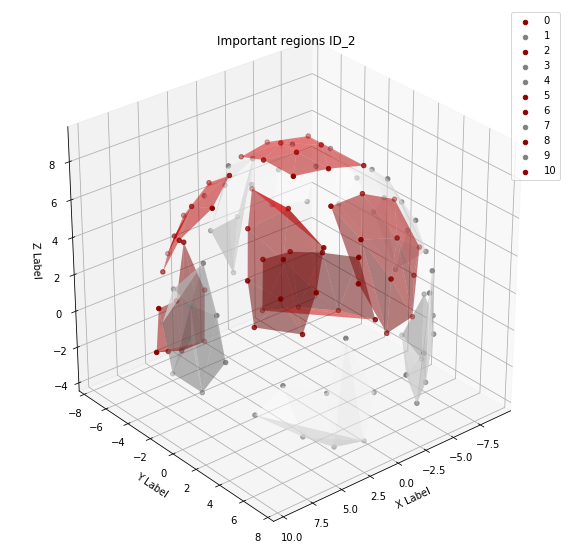

In [21]:

for each_angle in np.arange(0,360,10):
    n_clusters=11
    colors_list=sns.color_palette("husl", n_clusters)

    i=0
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    for label,df in clustered_channels.groupby("cluster"):
        #if(label==7 or label==6):
        #dedelta
        if(label in [0,2,5,6,8,10]):
            ax.scatter(df.X, df.Y, df.Z,color="darkred",label=label)
            ax.plot_trisurf(df.X, df.Y, df.Z,color="red",alpha=0.5)
        else:
            ax.scatter(df.X, df.Y, df.Z,color="gray",label=label)
            ax.plot_trisurf(df.X, df.Y, df.Z,color="white",alpha=0.5)
        #ax.view_init(30)
        i=i+1
    plt.legend()
    ax.set_title("Important regions ID_2")
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    ax.view_init(30, each_angle)
    plt.savefig("./img_ID_2/montage_importance/"+str(each_angle)+"_3d.png",
                bbox_inches="tight", pad_inches=0)
    plt.close()
    
images=[]
for each_angle in np.arange(0,360,10):
    images.append(imageio.imread("./img_ID_2/montage_importance/"+str(each_angle)+"_3d.png"))

imageio.mimsave( "./img_ID_2/montage_importance_rotation.gif", images, duration=0.5)

<img src="./img_ID_2/montage_importance_rotation.gif" >

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h4>Let's create the transformed test set on selected features in ID_2</h4>
</div>

In [25]:

path_to_deploy="/home/gari/Desktop/master_tesis_v3/MLDiagnosisTool/"
sys.path.append(path_to_deploy)   

#Personal library to deploy models from my MLDiagnosis tool
from Deploy import deploy_helper


#Path to folder with output of CoreML
path="./ID_2/eeg_delta_theta"

#Use auxiliar function "deploy_helper"
# this will configure the objects
# to exactly reproduce the training set-up
# in new data.
predictor=deploy_helper(path)

#Read data test data
path_to_test="./ID_2/Datasets_delta_theta/prepared_test_data_set.file"
data_t=OFH.load_object(path_to_test)

#remode target from test set
y_real=data_t[["target"]]
data_t.drop("target",axis=1,inplace=True)

#Create DataFrame of predictions.
predictions=predictor.make_predictions(data_t,True)


In [26]:
predictor.X.head()

,0,8,9,13,16,17,21,0^2,0 9,0 11,...,16 20,16 21,17^2,17 21,18^2,18 20,18 21,20^2,20 21,21^2
0,0.627473,0.496206,0.225887,0.077673,0.473613,0.226701,0.132971,0.393722,0.141738,0.018195,...,0.333627,0.062977,0.051393,0.030145,0.492507,0.494361,0.093318,0.496221,0.093669,0.017681
1,0.744915,0.623389,0.155883,0.057092,0.567959,0.191921,0.116324,0.554898,0.116120,0.013700,...,0.449641,0.066067,0.036834,0.022325,0.768182,0.693874,0.101953,0.626755,0.092091,0.013531
2,0.678412,0.563371,0.215827,0.093188,0.513319,0.242417,0.093838,0.460243,0.146419,0.037196,...,0.404073,0.048169,0.058766,0.022748,0.786293,0.698016,0.083209,0.619649,0.073867,0.008806
3,0.676481,0.586197,0.179138,0.074444,0.602336,0.181654,0.167500,0.457627,0.121183,0.024137,...,0.433182,0.100891,0.032998,0.030427,0.661717,0.585016,0.136255,0.517205,0.120461,0.028056
4,0.654338,0.507040,0.240765,0.080914,0.493645,0.267776,0.201071,0.428158,0.157541,0.029971,...,0.333836,0.099258,0.071704,0.053842,0.563734,0.507756,0.150969,0.457337,0.135978,0.040430


In [30]:
target_adhd=y_real[y_real["target"]==1][["target"]]
target_healthy=y_real[y_real["target"]==0][["target"]]


signal_adhd=predictor.X.iloc[target_adhd.index]
signal_healthy=predictor.X.iloc[target_healthy.index]
#delta
#signal_13_17=predictor.X[["13 17"]]
#signal_13_20=predictor.X[["13 20"]]
#signal_13=predictor.X[["13"]]

#signal_0 =predictor.X[["0"]]
#signal_11_11=predictor.X[["11^2"]]
#signal_4_20=predictor.X[["4 20"]]


list_channels=["13 17","13 20","13","0","11^2","4 20","16 21","8 14"]

In [31]:
def print_ttest(list_channels,signal_adhd,signal_healthy,th=0.05):
    for each_channel in list_channels:
        t_test=ttest_ind(signal_adhd[each_channel],
                         signal_healthy[each_channel],equal_var=True)
        if(t_test[-1]<=th):
            print("*"*100)
            print("signficance "+each_channel+" feature")

            mean_adhd=signal_adhd[each_channel].mean()
            mean_healthy=signal_healthy[each_channel].mean()

            print(t_test[-1])
            print("mean "+each_channel+ "  ADHD",  mean_adhd)
            print("mean "+each_channel+ " Healthy",mean_healthy)
            print("*"*100)

<div style="background-color:#021A36;color:white;border-radius: 15px;padding:10px">
    <h4>Are "13 17","13 20","13","0","11^2","4 20" statistically different in ADHD and Healthy?</h4>
</div>

In [35]:
print_ttest(list_channels,signal_adhd,signal_healthy,th=500)

****************************************************************************************************
signficance 13 17 feature
0.017510007584339567
mean 13 17  ADHD 0.011131517219509151
mean 13 17 Healthy 0.007006156084068453
****************************************************************************************************
****************************************************************************************************
signficance 13 20 feature
0.14176642663524716
mean 13 20  ADHD 0.06406774574296924
mean 13 20 Healthy 0.056677909121898136
****************************************************************************************************
****************************************************************************************************
signficance 13 feature
0.05701048801887767
mean 13  ADHD 0.08183269948232219
mean 13 Healthy 0.0682581309512413
****************************************************************************************************
**********************************

<div style="background-color:#8b0000;color:white;border-radius: 15px;padding:10px">
<h1>conclusion</h1>
<ul>
<li>There is statistical evidence that the interaction between feature 13 (theta-k = 6) and feature 17 (theta-k = 8) is significantly different in subjects with ADHD compared to healthy subjects. $p<0.05$</li>

<li>There is statistical evidence that feature 11^2 (thetha*theta k=5) is signincally different in ADHD-healthy subjects$p<0.05$</li>

<li>There is statistical evidence that the interaction between feature 4 (delta-k = 2) and feature 20 (delta-k = 10) is significantly different in subjects with ADHD compared to healthy subjects. $p<0.05$</li>
</ul>
</div>

In [78]:

for each_angle in np.arange(0,360,10):
    n_clusters=11
    colors_list=sns.color_palette("husl", n_clusters)

    i=0
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    for label,df in clustered_channels.groupby("cluster"):
        #if(label==7 or label==6):
        #dedelta
        if(label in [6,8]):
            ax.scatter(df.X, df.Y, df.Z,color="darkred",label="theta-theta 13-17")
            ax.plot_trisurf(df.X, df.Y, df.Z,color="red",alpha=0.5)
        elif(label in [5]):
            ax.scatter(df.X, df.Y, df.Z,color="darkblue",label="theta*theta 11^2")
            ax.plot_trisurf(df.X, df.Y, df.Z,color="blue",alpha=0.5)
        elif(label in [2,10]):
            ax.scatter(df.X, df.Y, df.Z,color="darkgreen",label="delta 4-20")
            ax.plot_trisurf(df.X, df.Y, df.Z,color="green",alpha=0.5)
        else:
            ax.scatter(df.X, df.Y, df.Z,color="gray")
            ax.plot_trisurf(df.X, df.Y, df.Z,color="white",alpha=0.5)
        #ax.view_init(30)
        i=i+1
    plt.legend()
    ax.set_title("Statistically different regions (p<0.05)")
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    ax.view_init(30, each_angle)
    plt.savefig("./img_ID_2/montage_stat/"+str(each_angle)+"_3d.png",
                bbox_inches="tight", pad_inches=0)
    plt.close()
    
images=[]
for each_angle in np.arange(0,360,10):
    images.append(imageio.imread("./img_ID_2/montage_stat/"+str(each_angle)+"_3d.png"))

imageio.mimsave( "./img_ID_2/montage_stat.gif", images, duration=0.5)

<img src="./img_ID_2/montage_stat.gif" >

In [35]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 1, 
                                            stop = 50, 
                                            num = 30)]
#n_estimators.append("warn")
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 50)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
grid = {'n_estimators': n_estimators,
'random_state':[0,10,42,13],
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [36]:
grid

{'n_estimators': [1,
  2,
  4,
  6,
  7,
  9,
  11,
  12,
  14,
  16,
  17,
  19,
  21,
  22,
  24,
  26,
  28,
  29,
  31,
  33,
  34,
  36,
  38,
  39,
  41,
  43,
  44,
  46,
  48,
  50],
 'random_state': [0, 10, 42, 13],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10,
  10,
  11,
  12,
  13,
  14,
  14,
  15,
  16,
  17,
  18,
  18,
  19,
  20,
  21,
  22,
  23,
  23,
  24,
  25,
  26,
  27,
  27,
  28,
  29,
  30,
  31,
  32,
  32,
  33,
  34,
  35,
  36,
  36,
  37,
  38,
  39,
  40,
  41,
  41,
  42,
  43,
  44,
  45,
  45,
  46,
  47,
  48,
  49,
  50,
  None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [4]:
import pandas as pd

In [37]:
grid_df=pandas.DataFrame({'parameter':list(grid.keys())},columns=['parameter','values']).set_index('parameter')

for key,value in grid.items():
    grid_df.loc[key]=[value]


grid_df

,values
parameter,
n_estimators,"[1, 2, 4, 6, 7, 9, 11, 12, 14, 16, 17, 19, 21,..."
random_state,"[0, 10, 42, 13]"
max_features,"[auto, sqrt]"
max_depth,"[10, 10, 11, 12, 13, 14, 14, 15, 16, 17, 18, 1..."
min_samples_split,"[2, 5, 10]"
min_samples_leaf,"[1, 2, 4]"
bootstrap,"[True, False]"


In [38]:
grid_df.to_csv("./grid_rf.csv")
    
    

['min_child_weight',
 'max_depth',
 'learning_rate',
 'reg_alpha',
 'reg_lambda',
 'gamma',
 'subsample',
 'colsample_bytree',
 'objective',
 'nthread',
 'scale_pos_weight',
 'seed',
 'n_estimators']